# Homework 3

Write a program to generate images and histograms:
(a) original image and its histogram
(b) image with intensity divided by 3 and its histogram
(c) image after applying histogram equalization to (b) and its histogram

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[0], img.shape[1]

In [2]:
#generate histogram
def histogram(img):
    hist = np.zeros(256)   
    for i in range(h):
        for j in range(w):
            hist[img[i][j]] += 1
    plt.plot(hist)
    plt.show()

In [3]:
#intensity divided by 3
def IntensityDividedBy3():
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            new_img[i][j] = img[i][j] / 3
    return new_img

In [4]:
#create lookup table
def creat_lookup_table(img):
    table = np.zeros(256)

    #histogram
    for i in range(h):
        for j in range(w):
            table[img[i][j]] += 1
    #pdf
    for i in range(256):
        table[i] = table[i] / (h * w) * 255
    #cdf
    for i in range(1, 256):
        table[i] += table[i-1]
    #round
    for i in range(256):
        table[i] = round(table[i])

    return table

In [5]:
#equalization
def Equalization(img):
    table = creat_lookup_table(img)
    #將影像mapping
    for i in range(h):
        for j in range(w):
            img[i][j] = table[img[i][j]]
    return img

In [6]:
#顯示影像
def show_result(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

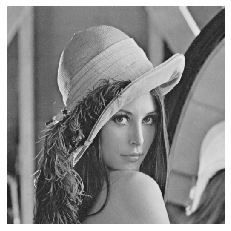

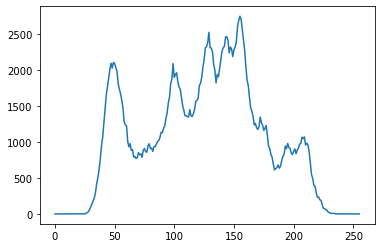

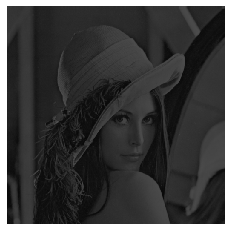

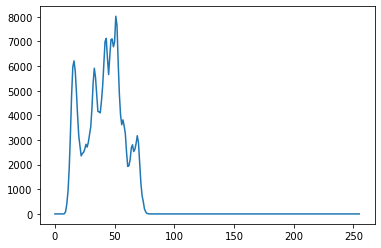

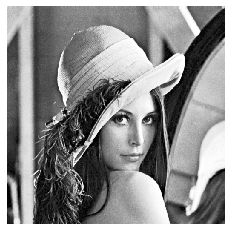

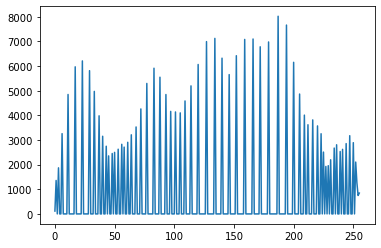

In [7]:
show_result(img)
histogram(img)
b_img = IntensityDividedBy3()
show_result(b_img)
histogram(b_img)
c_img = Equalization(b_img)
show_result(c_img)
histogram(c_img)